[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/Eng-Dan/kaggle-happywhale-competition/blob/master/happywhale-dataframes.ipynb)

# Context
This notebook generates two .csv files to use as input data for the happywhale 2022 competition.
* simplified_train.csv
* simplified_test.csv

The files contains the arrays retrieved from the resized train and test images dataset [Happywhale 2022 competition - Images 256 by 256](https://www.kaggle.com/datasets/engdan/happywhale-images-256-by-256).

The image arrays have been set to grayscale color map in order o reduce the size of the file. Thus, if your model should work with colored images, consider to use the original images from the competition.



# Packages and libraries

In [1]:
import os
import cv2
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Directory path variables

In [2]:
TRAIN_IMAGES_DIR = '../input/happywhale-images-256-by-256/resized_train_images'
TEST_IMAGES_DIR = '../input/happywhale-images-256-by-256/resized_test_images'

# Working dataframes

In [3]:
train_dataset_csv = '../input/happy-whale-and-dolphin/train.csv'
sample_submission_csv = '../input/happy-whale-and-dolphin/sample_submission.csv'

In [4]:
train_df = pd.read_csv(train_dataset_csv)
test_df = pd.read_csv(sample_submission_csv)

In [5]:
train_df.head(5)

,image,species,individual_id
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
1,000562241d384d.jpg,humpback_whale,1a71fbb72250
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392


In [6]:
test_df.head(5)

,image,predictions
0,000110707af0ba.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
1,0006287ec424cb.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
2,000809ecb2ccad.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
3,00098d1376dab2.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
4,000b8d89c738bd.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...


# Retrieving the images array

The function bellow will add the `image_array` column to the required dataframes.

In [7]:
def add_image_array_column(dataframe, images_source_dir):
    images_array = []
    num_images = dataframe['image'].size
    print('Process started...')
    for index in range(num_images):
        images_array.append(cv2.imread(os.path.join(images_source_dir, dataframe['image'].iloc[index]),
                                       cv2.IMREAD_GRAYSCALE))
    
        if (index % 2000) == 0:
            print('Images array added:', index, 'of', num_images)

    dataframe['image_array'] = images_array
    print('Process finished.')

First, lets apply the function to the `train_df`.

In [8]:
add_image_array_column(train_df, TRAIN_IMAGES_DIR)

Process started...
Images array added: 0 of 51033
Images array added: 2000 of 51033
Images array added: 4000 of 51033
Images array added: 6000 of 51033
Images array added: 8000 of 51033
Images array added: 10000 of 51033
Images array added: 12000 of 51033
Images array added: 14000 of 51033
Images array added: 16000 of 51033
Images array added: 18000 of 51033
Images array added: 20000 of 51033
Images array added: 22000 of 51033
Images array added: 24000 of 51033
Images array added: 26000 of 51033
Images array added: 28000 of 51033
Images array added: 30000 of 51033
Images array added: 32000 of 51033
Images array added: 34000 of 51033
Images array added: 36000 of 51033
Images array added: 38000 of 51033
Images array added: 40000 of 51033
Images array added: 42000 of 51033
Images array added: 44000 of 51033
Images array added: 46000 of 51033
Images array added: 48000 of 51033
Images array added: 50000 of 51033
Process finished.


Now, checking if all worked as expected.

In [9]:
train_df.head(5)

,image,species,individual_id,image_array
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,"[[115, 116, 115, 121, 123, 129, 131, 136, 137,..."
1,000562241d384d.jpg,humpback_whale,1a71fbb72250,"[[183, 185, 187, 180, 181, 190, 190, 190, 194,..."
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b,"[[161, 163, 168, 162, 171, 175, 172, 175, 178,..."
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,"[[135, 144, 161, 167, 176, 183, 185, 186, 186,..."
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392,"[[89, 77, 83, 76, 78, 84, 73, 75, 92, 77, 70, ..."


ef84a0ff56cc5f.jpg
humpback_whale
1a20c92ffe68 



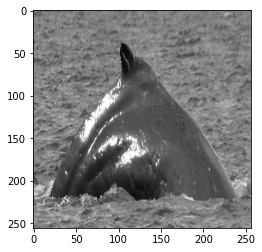

In [10]:
image_check = train_df.iloc[47696]
print(image_check.image)
print(image_check.species)
print(image_check.individual_id, '\n')
plt.imshow(image_check.image_array, cmap='gray')

Finally, applying the same process to the `test_df` (from `sample_submission.csv` file).

In [11]:
add_image_array_column(test_df, TEST_IMAGES_DIR)

Process started...
Images array added: 0 of 27956
Images array added: 2000 of 27956
Images array added: 4000 of 27956
Images array added: 6000 of 27956
Images array added: 8000 of 27956
Images array added: 10000 of 27956
Images array added: 12000 of 27956
Images array added: 14000 of 27956
Images array added: 16000 of 27956
Images array added: 18000 of 27956
Images array added: 20000 of 27956
Images array added: 22000 of 27956
Images array added: 24000 of 27956
Images array added: 26000 of 27956
Process finished.


# CSV files generation

In [12]:
train_df.to_csv('simplified_train.csv',index=False)

In [13]:
test_df.to_csv('simplified_test.csv',index=False)